In [1]:
%run ../../shared_setup.ipynb

The Cython magic has been move to the Cython package, hence 
`%load_ext cythonmagic` is deprecated; Please use `%load_ext Cython` instead.

Though, because I am nice, I'll still try to load it for you this time.


In [2]:
chrom_offset = dict()
for i, chrom in enumerate(CHROMOSOMES):
    chrom_offset[chrom] = sum(len(fasta[str(c, 'ascii')]) for c in CHROMOSOMES[:i])
chrom_offset

{b'Pf3D7_01_v3': 0,
 b'Pf3D7_02_v3': 640851,
 b'Pf3D7_03_v3': 1587953,
 b'Pf3D7_04_v3': 2655924,
 b'Pf3D7_05_v3': 3856414,
 b'Pf3D7_06_v3': 5199971,
 b'Pf3D7_07_v3': 6618213,
 b'Pf3D7_08_v3': 8063420,
 b'Pf3D7_09_v3': 9536225,
 b'Pf3D7_10_v3': 11077960,
 b'Pf3D7_11_v3': 12765616,
 b'Pf3D7_12_v3': 14803956,
 b'Pf3D7_13_v3': 17075450,
 b'Pf3D7_14_v3': 20000686}

In [3]:
tbl_co = (
    etl
    .frompickle(os.path.join(PUBLIC_DIR, 'tbl_co.pickle'))
    .addfield('pos_abs', lambda row: chrom_offset[row.chrom] + row.co_pos_mid)
    .sort('pos_abs')
)
display_with_nrows(tbl_co, caption='CO events')

0|sample,1|chrom,2|co_pos_mid,3|co_pos_min,4|co_pos_max,5|co_pos_range,6|cross,7|co_from_parent,8|co_to_parent,9|pos_abs
B1SD/PG0015-C/ERR019044,b'Pf3D7_01_v3',145052,144877,145227,350,hb3_dd2,hb3,dd2,145052
GC03/PG0021-C/ERR015447,b'Pf3D7_01_v3',163584,163145,164024,879,hb3_dd2,dd2,hb3,163584
XF12/PG0102-C/ERR029143,b'Pf3D7_01_v3',206769,205803,207736,1933,7g8_gb4,gb4,7g8,206769
7C159/PG0040-Cx/ERR107475,b'Pf3D7_01_v3',206905,206074,207736,1662,hb3_dd2,hb3,dd2,206905
CH3_61/PG0033-Cx/ERR175544,b'Pf3D7_01_v3',206905,206074,207736,1662,hb3_dd2,dd2,hb3,206905


In [4]:
tbl_nco = (etl
    .frompickle(os.path.join(PUBLIC_DIR, 'tbl_conversion_tracts.pickle'))
    .eq('tract_type', 'NCO')
    # exclude the really long outliers
    .lt('tract_length_min', 18000)
    .addfield('pos_abs', lambda row: chrom_offset[row.chrom] + row.tract_start_max)
    .sort('pos_abs')
)
display_with_nrows(tbl_nco, caption='NCO tracts')

0|sample,1|cross,2|chrom,3|tract_start_min,4|tract_start_mid,5|tract_start_max,6|tract_stop_min,7|tract_stop_mid,8|tract_stop_max,9|tract_length_min,10|tract_length_mid,11|tract_length_max,12|tract_support,13|tract_is_complex,14|tract_blocks,15|co_pos_mid,16|co_pos_min,17|co_pos_max,18|co_pos_range,19|tract_type,20|pos_abs
7C183/PG0042-C/ERR015448,hb3_dd2,b'Pf3D7_01_v3',127692,128117,128543,130198,130648,131098,1655,2531,3406,6,False,1,None,None,None,None,NCO,128543
GC06/PG0028-C/ERR015456,hb3_dd2,b'Pf3D7_01_v3',175754,175854,175955,176899,177127,177355,944,1273,1601,4,False,1,None,None,None,None,NCO,175955
QC13/PG0016-C/ERR012895,hb3_dd2,b'Pf3D7_01_v3',243925,245613,247302,247675,247879,248084,373,2266,4159,3,False,1,None,None,None,None,NCO,247302
DAN/PG0098-C/ERR027110,7g8_gb4,b'Pf3D7_01_v3',323279,323549,323820,324123,325229,326336,303,1680,3057,3,False,1,None,None,None,None,NCO,323820
DEV/PG0081-CW/ERR045633,7g8_gb4,b'Pf3D7_01_v3',418841,419431,420022,420268,420714,421160,246,1283,2319,3,False,1,None,None,None,None,NCO,420022


In [5]:
totsize = sum(len(fasta[str(chrom, 'ascii')]) for chrom in CHROMOSOMES)
totsize

23292622

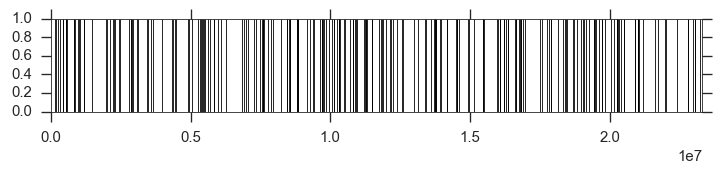

In [6]:
fig, ax = plt.subplots(figsize=(7, 1))
x = tbl_nco.values('pos_abs').array()
ax.vlines(x, 0, 1)
ax.set_xlim(0, totsize);

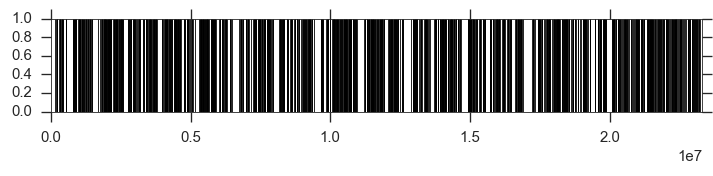

In [7]:
fig, ax = plt.subplots(figsize=(7, 1))
x = tbl_co.values('pos_abs').array()
ax.vlines(x, 0, 1)
ax.set_xlim(0, totsize);

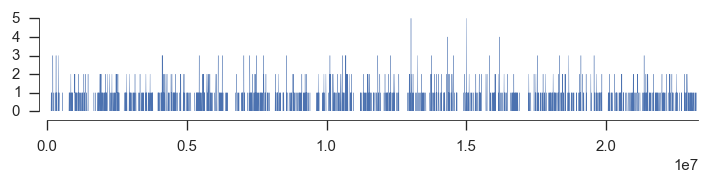

In [52]:
v = tbl_co.values('pos_abs').array()
y, windows = allel.stats.windowed_count(v, 5000, start=0, stop=totsize)
x = windows.mean(axis=1)
fig, ax = plt.subplots(figsize=(7, 1))
sns.despine(ax=ax, offset=5)
ax.plot(x, y, lw=.2)
ax.set_xlim(0, totsize);

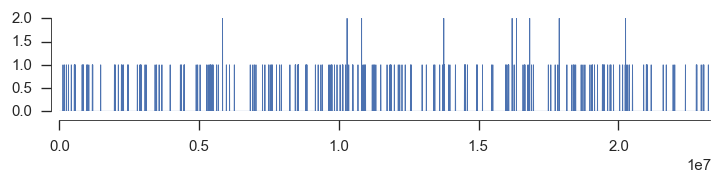

In [27]:
v = tbl_nco.values('pos_abs').array()
y, windows = allel.stats.windowed_count(v, 5000, start=0, stop=totsize)
x = windows.mean(axis=1)
fig, ax = plt.subplots(figsize=(7, 1))
sns.despine(ax=ax, offset=5)
ax.plot(x, y)
ax.set_xlim(0, totsize);

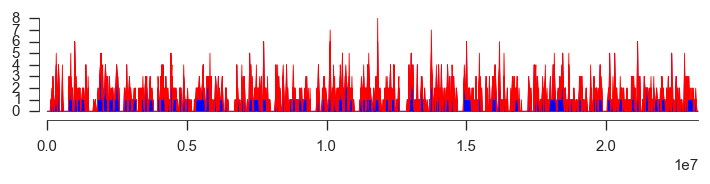

In [39]:
v1 = tbl_co.values('pos_abs').array()
y1, windows = allel.stats.windowed_count(v1, 20000, start=0, stop=totsize)
v2 = tbl_nco.values('pos_abs').array()
y2, windows = allel.stats.windowed_count(v2, 20000, start=0, stop=totsize)
x = windows.mean(axis=1)

fig, ax = plt.subplots(figsize=(7, 1))
sns.despine(ax=ax, offset=5)
ax.fill_between(x, 0, y1, color='b', lw=0.5)
ax.fill_between(x, y1, y1+y2, color='r', lw=0.5)
ax.set_xlim(0, totsize);

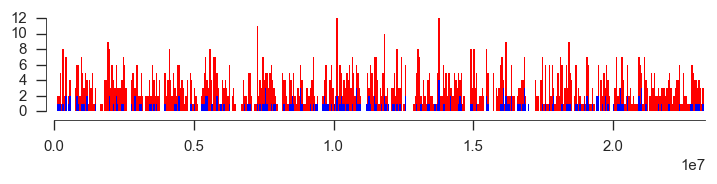

In [37]:
window_size = 50000

v1 = tbl_co.values('pos_abs').array()
y1, windows = allel.stats.windowed_count(v1, window_size, start=0, stop=totsize)
v2 = tbl_nco.values('pos_abs').array()
y2, windows = allel.stats.windowed_count(v2, window_size, start=0, stop=totsize)
x = windows.mean(axis=1)

fig, ax = plt.subplots(figsize=(7, 1))
sns.despine(ax=ax, offset=5)
ax.bar(left=windows[:, 0], height=y2, width=window_size, color='b', lw=0)
ax.bar(left=windows[:, 0], height=y1, bottom=y2, width=window_size, color='r', lw=0)
ax.set_xlim(0, totsize);

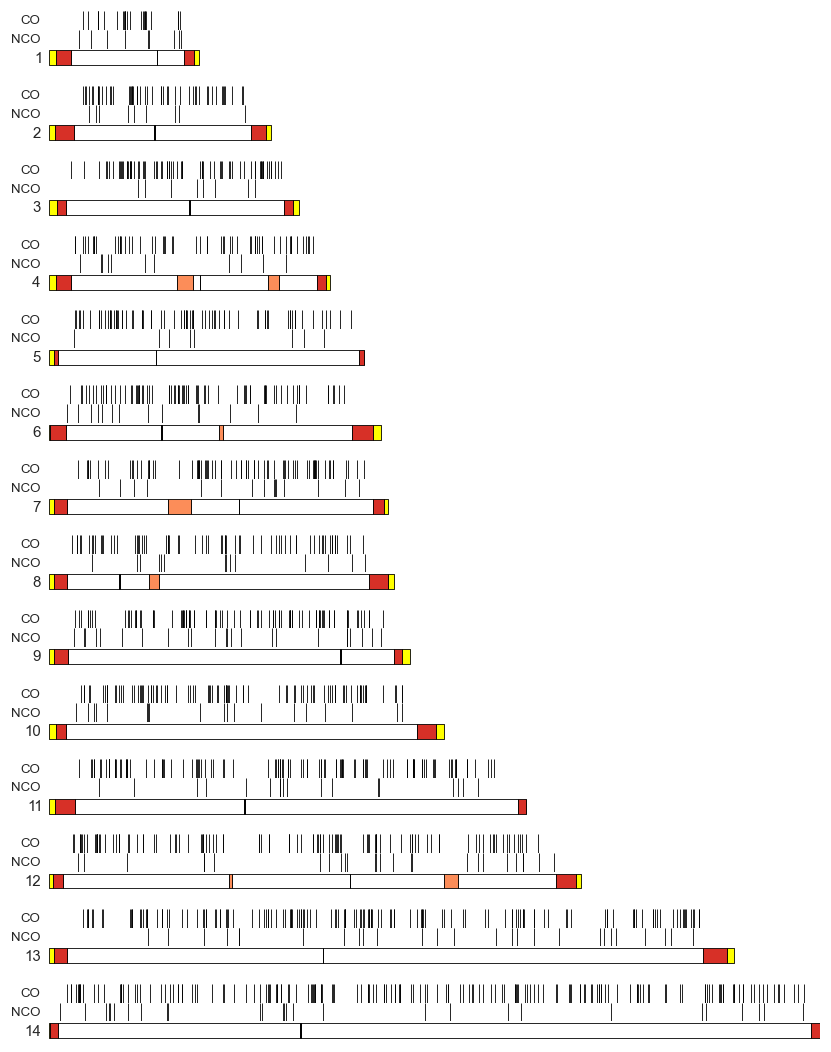

In [53]:
max_chr_size = max(len(fasta[str(chrom, 'ascii')]) for chrom in CHROMOSOMES)

fig = plt.figure(figsize=(7, 9))

gs = mpl.gridspec.GridSpec(4*14, 1, height_ratios=[1, 1, 1, 1]*14)
gs.update(hspace=0)

for i, chrom in enumerate(CHROMOSOMES):
    
    ax = fig.add_subplot(gs[i*4+0])
    sns.despine(ax=ax, left=True, bottom=True)
    x = tbl_co.eq('chrom', chrom).values('co_pos_mid').array()
    ax.vlines(x, 0, 1)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim(-5000, max_chr_size)
    ax.set_ylabel('CO', rotation=0, ha='right', va='center', fontsize=8)
    
    ax = fig.add_subplot(gs[i*4+1])
    sns.despine(ax=ax, left=True, bottom=True)
    x = tbl_nco.eq('chrom', chrom).values('tract_start_max').array()
    ax.vlines(x, 0, 1)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim(-5000, max_chr_size)
    ax.set_ylabel('NCO', rotation=0, ha='right', va='center', fontsize=8)

    chrom = str(chrom, 'ascii')
    ax = fig.add_subplot(gs[i*4+2])
    plot_accessibility(ax, chrom, linewidth=.5)
    ax.set_xlim(-5000, max_chr_size)
    chrnum = int(chrom[6:8])
    ax.set_ylabel(chrnum, ha='right', va='center', rotation=0)
    
fig.tight_layout()

fn = '../../artwork/supp/recombination_map.{dpi}.{fmt}'
for fmt in 'jpeg', 'png':
    for dpi in 120, 300:
        fig.savefig(fn.format(dpi=dpi, fmt=fmt), dpi=dpi, jpeg_quality=100)


In [ ]:
max_chr_size = max(len(fasta[str(chrom, 'ascii')]) for chrom in CHROMOSOMES)

fig = plt.figure(figsize=(7, 9))

gs = mpl.gridspec.GridSpec(4*14, 1, height_ratios=[1, 1, 1, 1]*14)
gs.update(hspace=0)

for i, chrom in enumerate(CHROMOSOMES):
    
    ax = fig.add_subplot(gs[i*4+0])
    sns.despine(ax=ax, left=True, bottom=True)
    x = tbl_co.eq('chrom', chrom).values('co_pos_mid').array()
    ax.vlines(x, 0, 1)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim(-5000, max_chr_size)
    ax.set_ylabel('CO', rotation=0, ha='right', va='center', fontsize=8)
    
    ax = fig.add_subplot(gs[i*4+1])
    sns.despine(ax=ax, left=True, bottom=True)
    x = tbl_nco.eq('chrom', chrom).values('tract_start_max').array()
    ax.vlines(x, 0, 1)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim(-5000, max_chr_size)
    ax.set_ylabel('NCO', rotation=0, ha='right', va='center', fontsize=8)

    chrom = str(chrom, 'ascii')
    ax = fig.add_subplot(gs[i*4+2])
    plot_accessibility(ax, chrom, linewidth=.5)
    ax.set_xlim(-5000, max_chr_size)
    chrnum = int(chrom[6:8])
    ax.set_ylabel(chrnum, ha='right', va='center', rotation=0)
    
fig.tight_layout()


# fn = '../../artwork/supp/genome_regions_map.{dpi}.{fmt}'
# for fmt in 'jpeg', 'png':
#     for dpi in 120, 300:
#         fig.savefig(fn.formatm(dpi=dpi, fmt=fmt), dpi=dpi, jpeg_quality=100)


In [14]:
cmp = ['SC05/PG0019-C/ERR019051', '7C126/PG0047-C/ERR015452']
tbl_co.valuecounts('sample').selectin('sample', cmp).displayall(caption='CO')
tbl_nco.valuecounts('sample').selectin('sample', cmp).displayall(caption='NCO')
tbl_nco.selectin('sample', cmp).displayall(caption='NCO')

0|sample,1|count,2|frequency
SC05/PG0019-C/ERR019051,23,0.019262981574539362
7C126/PG0047-C/ERR015452,19,0.015912897822445562


0|sample,1|count,2|frequency
7C126/PG0047-C/ERR015452,1,0.004347826086956522
SC05/PG0019-C/ERR019051,1,0.004347826086956522


0|sample,1|cross,2|chrom,3|tract_start_min,4|tract_start_mid,5|tract_start_max,6|tract_stop_min,7|tract_stop_mid,8|tract_stop_max,9|tract_length_min,10|tract_length_mid,11|tract_length_max,12|tract_support,13|tract_is_complex,14|tract_blocks,15|co_pos_mid,16|co_pos_min,17|co_pos_max,18|co_pos_range,19|tract_type,20|pos_abs
SC05/PG0019-C/ERR019051,hb3_dd2,b'Pf3D7_07_v3',1321443,1321849,1322255,1322383,1322958,1323534,128,1109,2091,2,False,1,None,None,None,None,NCO,7940468
7C126/PG0047-C/ERR015452,hb3_dd2,b'Pf3D7_11_v3',985117,985591,986065,986262,986833,987405,197,1242,2288,4,False,1,None,None,None,None,NCO,13751681


In [13]:
tbl_nco.valuecounts('sample').displayall()

0|sample,1|count,2|frequency
7C111/PG0038-C/ERR015457,8,0.034782608695652174
CH3_61/PG0033-Cx/ERR175544,6,0.02608695652173913
3BA6/PG0022-Cx/ERR126027,6,0.02608695652173913
7C183/PG0042-C/ERR015448,6,0.02608695652173913
JF6/PG0079-C/ERR027102,6,0.02608695652173913
1BB5/PG0023-C/ERR015449,6,0.02608695652173913
NIC/PG0095-CW/ERR045631,5,0.021739130434782608
7C20/PG0037-C/ERR015451,5,0.021739130434782608
C09/PG0072-C/ERR019057,5,0.021739130434782608
D43/PG0029-Cx/ERR107474,5,0.021739130434782608
